In [17]:
# You can import *ANYTHING* you want here.
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error # Requires sklearn 0.24 (December 2020), update with conda/pip if needed.
from sklearn.model_selection import GridSearchCV, train_test_split

import pandas as pd

# Assignment 8: Tree methods

In this assignment we'll study tree methods and their capabilities as interpolators and extrapolators, and the importance of understanding your data. We will use a dataset of energy consumption of home appliances for houses in Chievres, Belgium. The data has the following variables:

- date time year-month-day hour:minute:second
- Appliances, energy use in Wh (**Target variable**)energy_extrapolation
- lights, energy use of light fixtures in the house in Wh
- T1, Temperature in kitchen area, in Celsius
- RH_1, Humidity in kitchen area, in %
- T2, Temperature in living room area, in Celsius
- RH_2, Humidity in living room area, in %
- T3, Temperature in laundry room area
- RH_3, Humidity in laundry room area, in %
- T4, Temperature in office room, in Celsius
- RH_4, Humidity in office room, in %
- T5, Temperature in bathroom, in Celsius
- RH_5, Humidity in bathroom, in %
- T6, Temperature outside the building (north side), in Celsius
- RH_6, Humidity outside the building (north side), in %
- T7, Temperature in ironing room , in Celsius
- RH_7, Humidity in ironing room, in %
- T8, Temperature in teenager room 2, in Celsius
- RH_8, Humidity in teenager room 2, in %
- T9, Temperature in parents room, in Celsius
- RH_9, Humidity in parents room, in %
- To, Temperature outside (from Chievres weather station), in Celsius
- Pressure (from Chievres weather station), in mm Hg
- RH_out, Humidity outside (from Chievres weather station), in %
- Wind speed (from Chievres weather station), in m/s
- Visibility (from Chievres weather station), in km
- Tdewpoint (from Chievres weather station), in C degrees

You are given two datasets: energy_appliances_standard.csv and energy_appliances_extrapolation.csv. The first dataset has typical consumption patterns, while the second one has the top 10% highest consumptions and will be used to test the extrapolating capacities of our models.


## Task 1: Random Forests (35/100)

Random Forests are excellent predictors. Usually we only need to tune one parameter: the number of trees in the model. However, how many trees are enough? Follow these steps:

1. Load the training dataset (energy_appliances_standard.csv) and show the descriptive statistics of the variables. (3 pts)

2. Create a train / test partition of the data using 30% of the data for the test set and a ```random_state``` value of 20201107(2 pts).

3. Follow [this example](https://scikit-learn.org/stable/auto_examples/ensemble/plot_ensemble_oob.html) and train a [Random Forest Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) using ```Appliances``` as the target variable. Test between 50 and 250 trees, plotting the Out-of-Bag (OOB) error after every iteration. Be patient as training can take a while. Written answer: What is the optimal number of trees for your model and why do you think this? (15 pts)

4. Train your final random forest with the number of trees you selected in part 3. Apply this model over your test set and over the extrapolating dataset (from the file ```energy_appliances_extrapolation.csv```), calculating the mean absolute percentual error for each dataset.  Show in a scatterplot the predicted value vs the real value of the target variable for both the test set and the extrapolation set (in the same plot), differentiating both by using different colors for the points. Written answer: How does the random forest model perform on predicting Appliance energy usage in the extrapolation data set? If it performs poorly, why? If it performs well, why? *Hint: look at the scatterplot*. (15 points)

In [2]:
# Data load
energy_consumption=pd.read_csv('energy_appliances_standard.csv')
energy_consumption.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
count,17735.000000,17735.000000,17735.000000,17735.000000,17735.000000,17735.000000,17735.000000,17735.000000,17735.000000,17735.000000,...,17735.000000,17735.000000,17735.000000,17735.000000,17735.000000,17735.000000,17735.000000,17735.000000,17735.000000,17735.000000
mean,68.121229,3.445729,21.688855,40.150264,20.293891,40.469997,22.230926,39.160423,20.860319,38.983631,...,22.050534,43.016242,19.505556,41.552215,7.314032,755.566425,80.249079,3.969812,38.305214,3.762879
std,30.182146,7.552424,1.604312,3.930099,2.171999,4.063088,1.969945,3.219280,2.047586,4.320711,...,1.961083,5.202160,2.010550,4.161873,5.291010,7.339842,14.768037,2.447164,11.957900,4.187098
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,16.306667,29.600000,14.890000,29.166667,-5.000000,729.366667,24.000000,0.000000,1.000000,-6.600000
25%,50.000000,0.000000,20.760000,37.260000,18.790000,37.930000,20.790000,36.826667,19.566667,35.500000,...,20.828889,39.200000,18.066667,38.530000,3.500000,751.000000,71.333333,2.000000,29.000000,0.933333
50%,60.000000,0.000000,21.600000,39.533333,19.926667,40.545000,22.100000,38.466667,20.666667,38.363333,...,22.166667,42.440000,19.390000,40.863333,6.850000,756.100000,84.333333,3.500000,40.000000,3.433333
75%,80.000000,0.000000,22.600000,42.863333,21.463333,43.326667,23.290000,41.530000,22.100000,42.066667,...,23.390000,46.590000,20.600000,44.290000,10.333333,760.950000,91.845238,5.333333,40.000000,6.550000
max,190.000000,50.000000,26.200000,59.633333,29.856667,56.026667,29.100000,49.656667,26.200000,51.000000,...,27.230000,58.780000,24.500000,53.326667,26.100000,772.283333,100.000000,14.000000,66.000000,15.500000


In [3]:
# Create train / test split
x_train, x_test, y_train, y_test = train_test_split(energy_consumption.iloc[:, 1:], # X
                                                    energy_consumption.iloc[:, 0],  # y
                                                    test_size = 0.3,           # Size of test
                                                    random_state = 20201107)   # Seed

In [4]:
# Define random forest
energy_forest = RandomForestRegressor(n_estimators=100, # Number doesn't matter as we will change this.
                                      criterion='mse',
                                      max_depth=None,
                                      min_samples_split=2,
                                      min_samples_leaf=1,
                                      min_weight_fraction_leaf=0.0,
                                      max_features='sqrt', # For a proper random forest
                                      max_leaf_nodes=None,
                                      min_impurity_decrease=0.0,
                                      min_impurity_split=None,
                                      bootstrap=True,
                                      oob_score=True, # Important to calculate the oob score
                                      random_state=20210302,
                                      verbose=0,
                                      warm_start=True # Needs to be incremental
                                      )

# Range of `n_estimators` values to explore.
min_estimators = 50
max_estimators = 250

# Define error list
error_rate = []

# iterate over forest
for i in range(min_estimators, max_estimators + 1):
    energy_forest.set_params(n_estimators=i)
    energy_forest.fit(x_train, y_train)

    # Record the OOB error for each `n_estimators=i` setting.
    oob_error = 1 - energy_forest.oob_score_
    error_rate.append((i, oob_error))

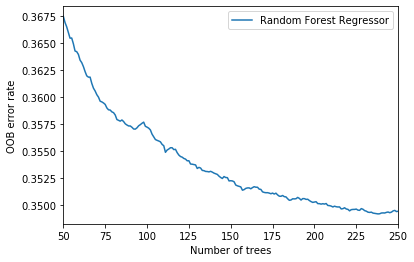

In [5]:
# Plot
xs, ys = zip(*error_rate)
plt.plot(xs, ys, label='Random Forest Regressor')

plt.xlim(min_estimators, max_estimators)
plt.xlabel("Number of trees")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

**Written answer: The curve starts going flat at around 225 trees or so. At that point, increasing the number of trees does not lead to an increase in predictive capability OOB as new trees do not bring new knowledge.[3 pts]**

In [6]:
# Final forest
energy_forest = RandomForestRegressor(n_estimators=225, # Number doesn't matter as we will change this.
                                      criterion='mse',
                                      max_depth=None,
                                      min_samples_split=2,
                                      min_samples_leaf=1,
                                      min_weight_fraction_leaf=0.0,
                                      max_features='sqrt', # For a proper random forest
                                      max_leaf_nodes=None,
                                      min_impurity_decrease=0.0,
                                      min_impurity_split=None,
                                      bootstrap=True,
                                      oob_score=False,
                                      random_state=20210302,
                                      n_jobs=16, # I have 16 cores. Adjust as needed.
                                      verbose=0,
                                      warm_start=False
                                      )

energy_forest.fit(x_train, y_train)

# Calculate error over test set
pred_test = energy_forest.predict(x_test)

# Load the second dataset
energy_extrapolation = pd.read_csv('energy_appliances_extrapolation.csv')

# Calculate the test set
pred_extrapolation = energy_forest.predict(energy_extrapolation.iloc[:, 1:])

In [7]:
# Print MAPE over the test set
print('Over a random test set, the MAPE of the Random Forest model is %.2f%%' % (mean_absolute_percentage_error(y_test, pred_test)*100))
print('Over the extrapolation set, the MAPE of the Random Forest model is %.2f%%' % (mean_absolute_percentage_error(energy_extrapolation['Appliances'], 
                                                                                                                        pred_extrapolation) *100))

Over a random test set, the MAPE of the Random Forest model is 18.60%
Over the extrapolation set, the MAPE of the Random Forest model is 69.99%


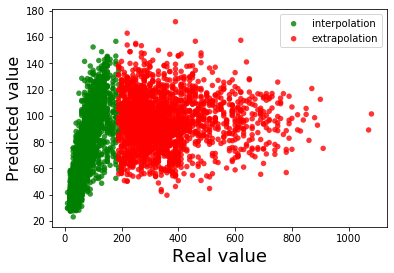

In [8]:
# Make the plot
pred_data = (pred_test, pred_extrapolation)
test_data = (y_test, energy_extrapolation['Appliances'])
colors = ("green", "red")
groups = ("interpolation", "extrapolation")

# Create plot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for x, y, color, group in zip(test_data, pred_data, colors, groups):
    ax.scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=30, label=group)

plt.legend(loc='upper right')
plt.xlabel('Real value', fontsize=18)
plt.ylabel('Predicted value', fontsize=16)
plt.show()

**Written answer: While the prediction over the test set is very good, the prediction over the extrapolation set is horrible. Random forests are not able to predict outside the original range! This happens because every tree returns the average of the value of the elements in each leaf, so it is impossible for it to extrapolate. While these models are fairly powerful predictors, they cannot extrapolate at all.**

## Task 2: XGBoosting model (40 pts)

Now we'll repeat the process for the XGB model, using an [```XGBRegressor``` object](https://xgboost.readthedocs.io/en/latest/python/python_api.html). The XGBoosting model is much more sensitive to parameter changes though as it allows to tune many different parameters. For this example:

1. Written answer: Why do we say we want to use a small learning rate? Why do we say the number of trees to use depends on each dataset/problem? Why do we want to use a small tree depth? (6 pts)

2. Selecting a 30% validation sample over the training set, tune your parameters using crossvalidation. Use the following ranges:
 - Learning rate: [0.01, 0.1, 0.2].
 - max_depth: 3 to 7.
 - Number of trees: [350, 400, 450, 500]

Leave the other parameters at the values we identified in the lab (except for the objective parameter and those related to classification problems) and use a seed of 20201107. Report the optimal values of your parameters. (20 pts)

3. Repeat part 4 of the previous task, but now for your XGB model trained over the optimal parameter combination and the complete training dataset. Plot the variable importance. Written answer: What are the most important variables? Can the XGB model extrapolate? How does it compare to a random forest? (14 pts)

**Written answer part 1 (2 pts each):**

- **Learning rate: Small values help by not drastically changing the learned functional shape so far. If the LR is large the model learns too much too soon and subsequent trees are not able to extract knowledge efficiently.**

- **Number of trees: As the number of trees depends on the complexity of the data and the size of the dataset, we cannot know a priori how many trees are optimal.**

- **Tree depth: An XGB model should have small trees to avoid too many strong learners.**



In [9]:
# Define the XGB model
energy_XGB = XGBRegressor(max_depth=3,                 # Depth of each tree
                          learning_rate=0.1,            # How much to shrink error in each subsequent training. Trade-off with no. estimators.
                          n_estimators=100,             # How many trees to use, the more the better, but decrease learning rate if many used.
                          verbosity=1,                  # If to show more errors or not.
                          objective='reg:squarederror',  # Type of target variable.
                          booster='gbtree',             # What to boost. Trees in this case.
                          gamma=0.001,                  # Minimum loss reduction required to make a further partition on a leaf node of the tree. (Controls growth!)
                          subsample=0.632,              # Subsample ratio. Can set lower
                          colsample_bytree=1,           # Subsample ratio of columns when constructing each tree.
                          colsample_bylevel=1,          # Subsample ratio of columns when constructing each level. 0.33 is similar to random forest.
                          colsample_bynode=1,           # Subsample ratio of columns when constructing each split.
                          reg_alpha=1,                  # Regularizer for first fit. alpha = 1, lambda = 0 is LASSO.
                          reg_lambda=0,                 # Regularizer for first fit.
                          random_state=20201107,        # Seed
                          missing=None,                 # How are nulls encoded?
                          tree_method='hist',        # I have a GPU. This significantly speeds up things. Otherwise use 'hist' and set n_jobs accordingly
                          n_jobs=1
                          )

In [10]:
# Define the parameters. Play with this grid!
param_grid = dict({'n_estimators': [350, 400, 450, 500],
                   'max_depth': [4, 5, 6, 7],
                   'learning_rate' : [0.01, 0.1, 0.2]
                  })

In [11]:
# Always a good idea to tune on a reduce sample of the train set, as we will call many functions.
val_train = x_train.copy()
val_train['y'] = y_train.copy()
val_train = val_train.sample(frac = 0.3,                # The fraction to extract
                             random_state = 20201107    # The seed.
                             )


# Define grid search object.
GridXGB = GridSearchCV(energy_XGB,        # Original XGB. 
                       param_grid,          # Parameter grid
                       cv = 3,              # Number of cross-validation folds.  
                       scoring = 'neg_root_mean_squared_error',   # How to rank outputs.
                       n_jobs = 16,         # Parallel jobs. -1 is "all you have" Careful, never clash threads. Either paralellize XGB OR this, NOT both.
                       refit = False,       # If refit at the end with the best. We'll do it manually.
                       verbose = 1          # If to show what it is doing.
                      )

In [12]:
# Train grid search. This takes a while! Go grab a coffee.
GridXGB.fit(val_train.iloc[:, :-1], val_train['y'])

Fitting 3 folds for each of 48 candidates, totalling 144 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0.001,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=0.1, max_delta_step=None,
                                    max_depth=3, min_child_weight=None,
                                    missing=None, monotone_constraints=None,
                                    n_estimators=100, n_jobs=1,
                                    num_parallel_tree=None,
                                    random_state=20201107, reg_alpha=1,
                                    reg_lambda=0, scale_pos_weight=None,
                                    subsample=0.632, tree_method='hist',
                                    validate_parameters=No

In [13]:
# Show best params
GridXGB.best_params_

{'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 500}

In [14]:
# Define the XGB model
energy_XGB = XGBRegressor(max_depth=GridXGB.best_params_.get('max_depth'),                 # Depth of each tree
                          learning_rate=GridXGB.best_params_.get('learning_rate'),            # How much to shrink error in each subsequent training. Trade-off with no. estimators.
                          n_estimators=GridXGB.best_params_.get('n_estimators'),             # How many trees to use, the more the better, but decrease learning rate if many used.
                          verbosity=1,                  # If to show more errors or not.
                          objective='reg:squarederror',  # Type of target variable.
                          booster='gbtree',             # What to boost. Trees in this case.
                          gamma=0.001,                  # Minimum loss reduction required to make a further partition on a leaf node of the tree. (Controls growth!)
                          subsample=0.632,              # Subsample ratio. Can set lower
                          colsample_bytree=1,           # Subsample ratio of columns when constructing each tree.
                          colsample_bylevel=1,          # Subsample ratio of columns when constructing each level. 0.33 is similar to random forest.
                          colsample_bynode=1,           # Subsample ratio of columns when constructing each split.
                          reg_alpha=1,                  # Regularizer for first fit. alpha = 1, lambda = 0 is LASSO.
                          reg_lambda=0,                 # Regularizer for first fit.
                          random_state=20201107,        # Seed
                          missing=None,                 # How are nulls encoded?
                          tree_method='gpu_hist'        # I have a GPU. This significantly speeds up things. Otherwise use 'hist' and set n_jobs accordingly
                          )

In [15]:
# Fit!
energy_XGB.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.001, gpu_id=0,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=7,
             min_child_weight=1, missing=None, monotone_constraints='()',
             n_estimators=500, n_jobs=32, num_parallel_tree=1,
             random_state=20201107, reg_alpha=1, reg_lambda=0,
             scale_pos_weight=1, subsample=0.632, tree_method='gpu_hist',
             validate_parameters=1, verbosity=1)

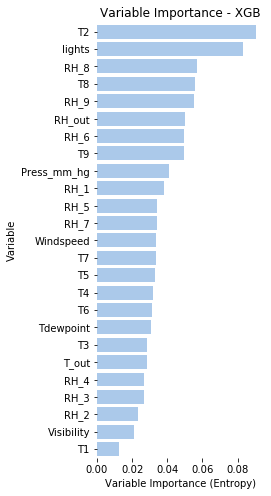

In [23]:
# Variable importance (4 pts)
importances = energy_XGB.feature_importances_
indices = np.argsort(importances)[::-1] 

f, ax = plt.subplots(figsize=(3, 8))
plt.title("Variable Importance - XGB")
sns.set_color_codes("pastel")
sns.barplot(y=[x_train.columns[i] for i in indices], 
            x=importances[indices], 
            label="Total", color="b")
ax.set(ylabel="Variable",
       xlabel="Variable Importance (Entropy)")
sns.despine(left=True, bottom=True)

**Written answer: We can see the most important variables are temperature in the living room and the lights energy consumption, hinting at night time use of the house, while the less important ones are the temperature in the kitchen and the visibility outside.**

Over a random test set, the MAPE of the XGB model is 21.97%
Over the extrapolation set, the MAPE of the XGB model is 71.43%


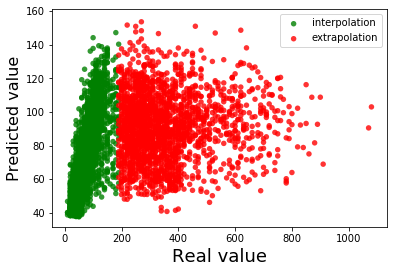

In [16]:
# Now the answer is equivalent to T1.
pred_test = energy_XGB.predict(x_test)

# Calculate the test set
pred_extrapolation = energy_XGB.predict(energy_extrapolation.iloc[:, 1:])

# Print MAPE over the test set
print('Over a random test set, the MAPE of the XGB model is %.2f%%' % (mean_absolute_percentage_error(y_test, pred_test)*100))
print('Over the extrapolation set, the MAPE of the XGB model is %.2f%%' % (mean_absolute_percentage_error(energy_extrapolation['Appliances'], 
                                                                                                                        pred_extrapolation) *100))
# Plot
# Make the plot
pred_data = (pred_test, pred_extrapolation)
test_data = (y_test, energy_extrapolation['Appliances'])
colors = ("green", "red")
groups = ("interpolation", "extrapolation")

# Create plot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for x, y, color, group in zip(test_data, pred_data, colors, groups):
    ax.scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=30, label=group)

plt.legend(loc='upper right')
plt.xlabel('Real value', fontsize=18)
plt.ylabel('Predicted value', fontsize=16)
plt.show()

**Written answer: The XGB model has a slightly worse performance than the Random Forest, and it is also a very bad extrapolator. The XGB model is also based on trees so there is no way it can extrapolate.**

## Task 3: Combined model (25 pts)

Now we will finally train a model on the combined data, by joining the extrapolation and the original dataset, and study the performance over the original test set, the new test set and the combined result. For this we will only use the Random Forest model. Use a seed of 20201107 for all functions that accept one.

1. Create a train / test split set over the extrapolation data, leaving approximately 30% of the data for testing purposes. Combine this train test with the original train set (let's call this the combined train set). (5 pts)
2. Train a Random Forest model over the **combined** train data. Discuss how many trees you used and why. (15 pts)
3. Plot the variable importance and compare it versus the XGB in task 1. Now that you more data, does the importance change? (5 pts)
3. Report the test set performance of your new model over the original test set, the test set you took over the extrapolation dataset and the combined test set. Plot the scatterplot of the both datasets as before in the same plot, differentiating the dataset by using colours. (10 pts)

Written answer: What happens now? What can you say about the new model?

In [24]:
# Create train / test split of the extrapolation data [2 pts]
x_train_extra, x_test_extra, y_train_extra, y_test_extra = train_test_split(energy_extrapolation.iloc[:, 1:], # X
                                                                            energy_extrapolation.iloc[:, 0],  # y
                                                                            test_size = 0.3,           # Size of test
                                                                            random_state = 20201107)   # Seed

# Combined sets [3 pts]
x_train_full = pd.concat([x_train, x_train_extra], axis = 0, ignore_index = True)
y_train_full = pd.concat([y_train, y_train_extra], axis = 0, ignore_index = True)
x_test_full = pd.concat([x_test, x_test_extra], axis = 0, ignore_index = True)
y_test_full = pd.concat([y_test, y_test_extra], axis = 0, ignore_index = True)


**To get the optimal number of trees I will start from 200 trees. It does not make much sense to have less if I have more and more complex data.**

In [25]:
# Define random forest
energy_forest = RandomForestRegressor(n_estimators=100, # Number doesn't matter as we will change this.
                                      criterion='mse',
                                      max_depth=None,
                                      min_samples_split=2,
                                      min_samples_leaf=1,
                                      min_weight_fraction_leaf=0.0,
                                      max_features='sqrt', # For a proper random forest
                                      max_leaf_nodes=None,
                                      min_impurity_decrease=0.0,
                                      min_impurity_split=None,
                                      bootstrap=True,
                                      oob_score=True, # Important to calculate the oob score
                                      random_state=20210302,
                                      verbose=0,
                                      warm_start=True # Needs to be incremental
                                      )

# Range of `n_estimators` values to explore.
min_estimators = 200

max_estimators = 400

# Define error list
error_rate = []

# iterate over forest
for i in range(min_estimators, max_estimators + 1):
    energy_forest.set_params(n_estimators=i)
    energy_forest.fit(x_train_full, y_train_full)

    # Record the OOB error for each `n_estimators=i` setting.
    oob_error = 1 - energy_forest.oob_score_
    error_rate.append((i, oob_error))

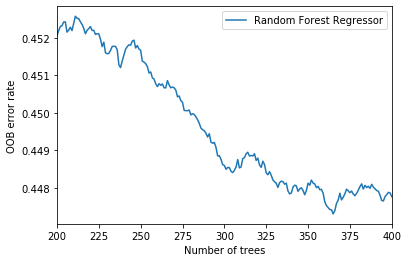

In [26]:
# Plot
xs, ys = zip(*error_rate)
plt.plot(xs, ys, label='Random Forest Regressor')

plt.xlim(min_estimators, max_estimators)
plt.xlabel("Number of trees")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

**After 330 trees the model stabilizes.**

In [29]:
# Final forest
energy_forest = RandomForestRegressor(n_estimators=330, # Final number of trees
                                      criterion='mse',
                                      max_depth=None,
                                      min_samples_split=2,
                                      min_samples_leaf=1,
                                      min_weight_fraction_leaf=0.0,
                                      max_features='sqrt', # For a proper random forest
                                      max_leaf_nodes=None,
                                      min_impurity_decrease=0.0,
                                      min_impurity_split=None,
                                      bootstrap=True,
                                      oob_score=False,
                                      random_state=20210302,
                                      n_jobs=16, # I have 16 cores. Adjust as needed.
                                      verbose=0,
                                      warm_start=False
                                      )

energy_forest.fit(x_train_full, y_train_full)

# Calculate error over test set
pred_test_full = energy_forest.predict(x_test_full)

# Calculate error over test set
pred_test = energy_forest.predict(x_test)

# Calculate the test set
pred_extrapolation = energy_forest.predict(energy_extrapolation.iloc[:, 1:])

**10 pts for tuning the number of trees and 5 pts for the forest itself.**

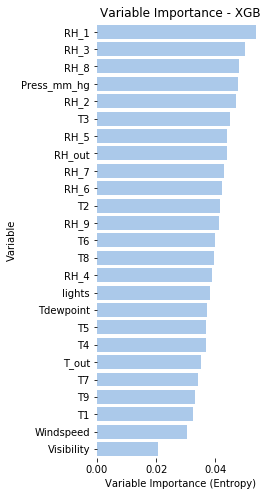

In [30]:
# Variable importance (3 pts)
importances = energy_forest.feature_importances_
indices = np.argsort(importances)[::-1] 

f, ax = plt.subplots(figsize=(3, 8))
plt.title("Variable Importance - XGB")
sns.set_color_codes("pastel")
sns.barplot(y=[x_train.columns[i] for i in indices], 
            x=importances[indices], 
            label="Total", color="b")
ax.set(ylabel="Variable",
       xlabel="Variable Importance (Entropy)")
sns.despine(left=True, bottom=True)

**Written answer: We can see the humidities now are more imporant than the temperatures. On the other hand, the visibility still is the less important variable. [2 pts]**

In [31]:
# Print MAPE over the test set
print('Over a random test set, the MAPE of the Random Forest model is %.2f%%' % (mean_absolute_percentage_error(y_test_full, pred_test_full)*100))
print('Over a random test set (non-extrapolation), the MAPE of the Random Forest model is %.2f%%' % (mean_absolute_percentage_error(y_test, pred_test)*100))
print('Over the extrapolation set, the MAPE of the Random Forest model is %.2f%%' % (mean_absolute_percentage_error(energy_extrapolation['Appliances'], 
                                                                                                                        pred_extrapolation) *100))

Over a random test set, the MAPE of the Random Forest model is 32.40%
Over a random test set (non-extrapolation), the MAPE of the Random Forest model is 32.14%
Over the extrapolation set, the MAPE of the Random Forest model is 19.61%


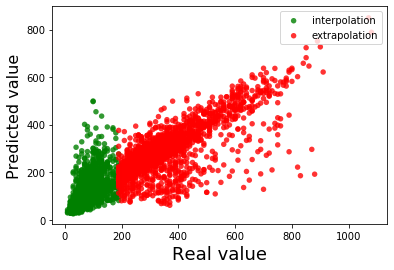

In [32]:
# Make the plot
pred_data = (pred_test, pred_extrapolation)
test_data = (y_test, energy_extrapolation['Appliances'])
colors = ("green", "red")
groups = ("interpolation", "extrapolation")

# Create plot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for x, y, color, group in zip(test_data, pred_data, colors, groups):
    ax.scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=30, label=group)

plt.legend(loc='upper right')
plt.xlabel('Real value', fontsize=18)
plt.ylabel('Predicted value', fontsize=16)
plt.show()

**Written answer: This is the importance of having a complete dataset, particularly for tree-based models. The combined model has a lower predictive capability over the original dataset (21% versus 32% MAPE), but it has an excellent predictive capability over the extrapolation test set. When we add the extra data the original patterns are not as clear as before, thus the model losses some predictive capability in that segment. However, it is able to generate a much better prediction over the formerly extrapolated dataset, with an impressive MAPE of around 20%.**

Always understand the limitations of your datasets! You won't be able to create models that are always good for every situation.